In [20]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [22]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [23]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [24]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data.select_dtypes(include=['float64']))

In [26]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.select_dtypes(include=['float64']).columns)

# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [27]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,11))

In [28]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
     k_model = KMeans(n_clusters=i, random_state=1)
     k_model.fit(df_market_data_scaled)
     inertia.append(k_model.inertia_)


c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [29]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [59]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_line = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)
elbow_line

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** When using an elbow curve, usually the best K value is determined by identifying the "elbow point" on the curve. According to this graph we see the drastic drop in inertia at K=4. As a result, the best value for K migt be 4. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [31]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [33]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [34]:
# Predict the clusters to group the cryptocurrencies using the scaled data
labels = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
labels

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [35]:
# Create a copy of the DataFrame
market_clustering = df_market_data_scaled.copy()

In [36]:
# Add a new column to the DataFrame with the predicted clusters
market_clustering['clusters'] = labels

# Display sample data
market_clustering.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [82]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
cluster_graph = market_clustering.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by = 'clusters',
    hover_cols = 'coin_id'
)
cluster_graph

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [38]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [41]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_info = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
pca_info = pd.DataFrame(pca_info, columns=['PC1', 'PC2', 'PC3'])
pca_info.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [42]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [45]:
sum([0.3719856, 0.34700813, 0.17603793])

0.89503166

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** total explained variance = sum([0.3719856, 0.34700813, 0.17603793]), therefore it is 0.89503166 or 89.5%. The total explained variance of 89.5% means that the significant potion of the original data is covered.

In [48]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(pca_info, columns=['PC1', 'PC2', 'PC3'])
# Copy the crypto names from the original data
df_market_data_pca['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_pca.set_index('coin_id', inplace=True)

# Display sample data
df_market_data_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [47]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [49]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_pca)
    inertia_pca.append(k_model.inertia_)

c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [50]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia_pca}
# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data_pca)

In [60]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_line = elbow_pca_df.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_pca_line

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** According to the graph the best K value will be 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The K value is the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [52]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state=1)

In [53]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_market_data_pca)

c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ulyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [54]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predict = model_pca.predict(df_market_data_pca)
# Print the resulting array of cluster values.
pca_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [55]:
# Create a copy of the DataFrame with the PCA data
market_pca_df = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_df['clusters'] = pca_predict

# Display sample data
market_pca_df.head()

,PC1,PC2,PC3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [81]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
cluster_pca_graph = market_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by = 'clusters',
    hover_cols = 'coin_id'
)
cluster_pca_graph

:NdOverlay   [clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [90]:
# Composite plot to contrast the Elbow curves
elbow_line = elbow_line.relabel("Original Elbow Line")
elbow_pca_line = elbow_pca_line.relabel("PCA Elbow Line")
composite_line_plot = elbow_line * elbow_pca_line
composite_line_plot

:Overlay
   .Curve.Original_Elbow_Line :Curve   [k]   (inertia)
   .Curve.PCA_Elbow_Line      :Curve   [k]   (inertia)

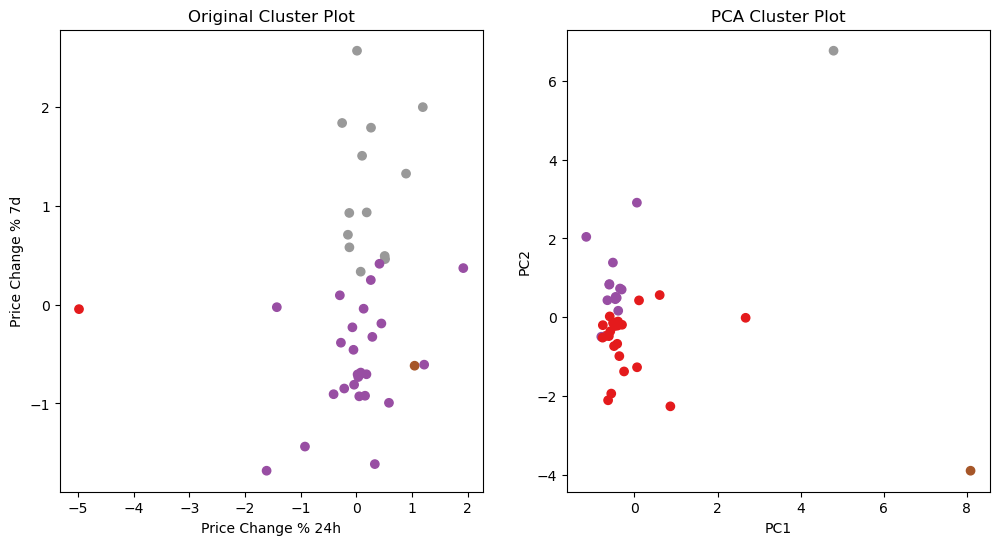

In [92]:
# Composite plot to contrast the clusters

#Import matplotlib
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the Original Cluster Plot
ax1.scatter(df_market_data_scaled['price_change_percentage_24h'], 
            df_market_data_scaled['price_change_percentage_7d'], c=labels, cmap='Set1')
ax1.set_xlabel('Price Change % 24h')
ax1.set_ylabel('Price Change % 7d')
ax1.set_title('Original Cluster Plot')

# Create PCA Cluster Plot
ax2.scatter(df_market_data_pca['PC1'], df_market_data_pca['PC2'], c=pca_predict, cmap='Set1')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Cluster Plot')

# Display the plots
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA for K-Means clustering, as shown in the graph, can result in more compact and better-separated clusters by focusing on the most significant variance in the data. However, this reduction in dimensionality can decrease interpretability, beacause original features' (before PCA) contributions to clustering become less clear. While PCA can highlight hidden patterns and reduce noise, the original clusters offer a more straightforward interpretation. As a result, the trade-off between clarity in clustering and interpretability of original features should be taken into an account.